In [1]:
#importing required libraries
import pyforest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#loading the  data
data=pd.read_csv("breastdf.csv")
data.head()

<IPython.core.display.Javascript object>

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.tail()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


# Data exploration and analysis

In [6]:
data.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [7]:
data.shape

(699, 11)

In [8]:
data.duplicated().sum()

8

In [9]:
data.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


data.describe()

# data cleaning 

In [11]:
#dropping the duplicates
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

## Data visualization

In [13]:
import warnings
warnings.simplefilter('ignore')

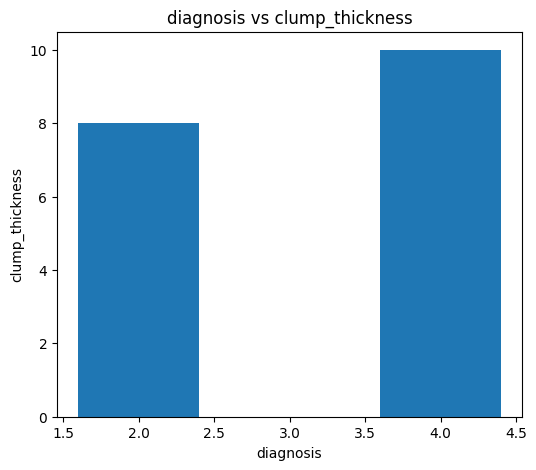

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.bar(data["class"],data["clump_thickness"])
plt.title('diagnosis vs clump_thickness')
plt.xlabel('diagnosis')
plt.ylabel('clump_thickness')

plt.show()


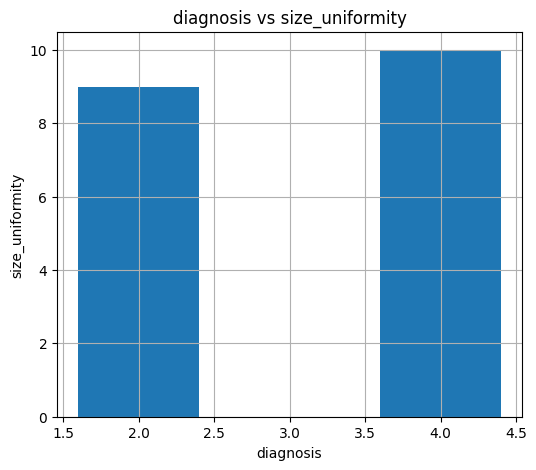

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.bar(data["class"],data["size_uniformity"])
plt.title('diagnosis vs size_uniformity')
plt.xlabel('diagnosis')
plt.ylabel('size_uniformity')
plt.grid(True)
plt.show()


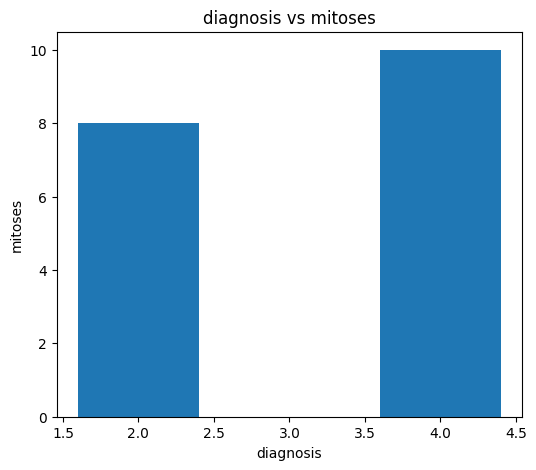

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.bar(data["class"],data["mitoses"])
plt.title('diagnosis vs mitoses')
plt.xlabel('diagnosis')
plt.ylabel('mitoses')
plt.show()


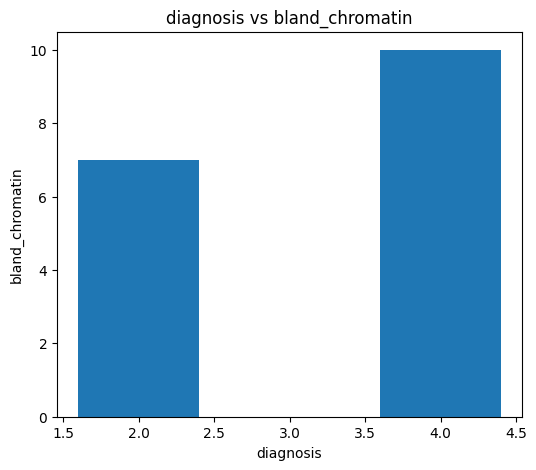

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.bar(data["class"],data["bland_chromatin"])
plt.title('diagnosis vs bland_chromatin')
plt.xlabel('diagnosis')
plt.ylabel('bland_chromatin')
plt.show()


<Axes: xlabel='size_uniformity', ylabel='Density'>

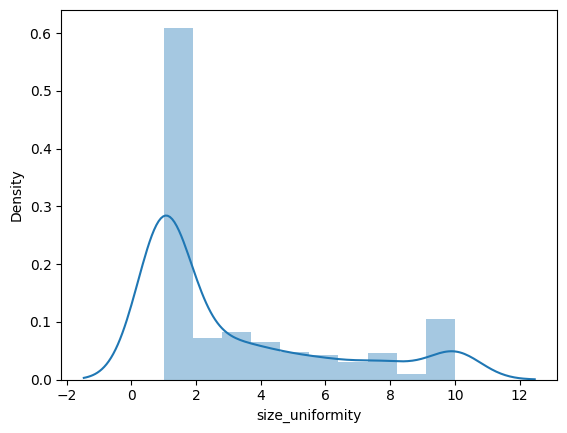

In [14]:
sns.distplot(data['size_uniformity'])

<Axes: xlabel='mitoses', ylabel='Density'>

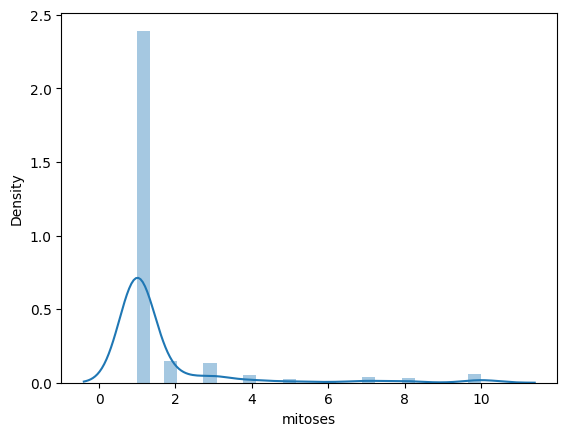

In [15]:
sns.distplot(data['mitoses'])

<Axes: xlabel='shape_uniformity', ylabel='Density'>

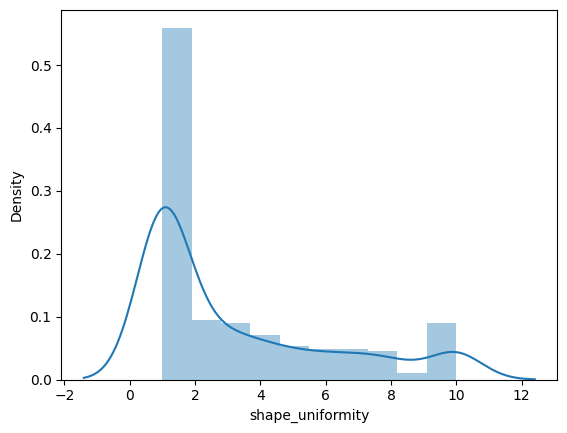

In [16]:
sns.distplot(data['shape_uniformity'])

<Axes: xlabel='normal_nucleoli', ylabel='Density'>

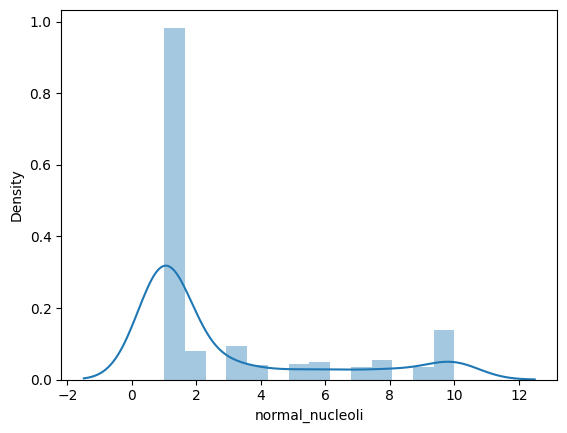

In [17]:
sns.distplot(data['normal_nucleoli'])

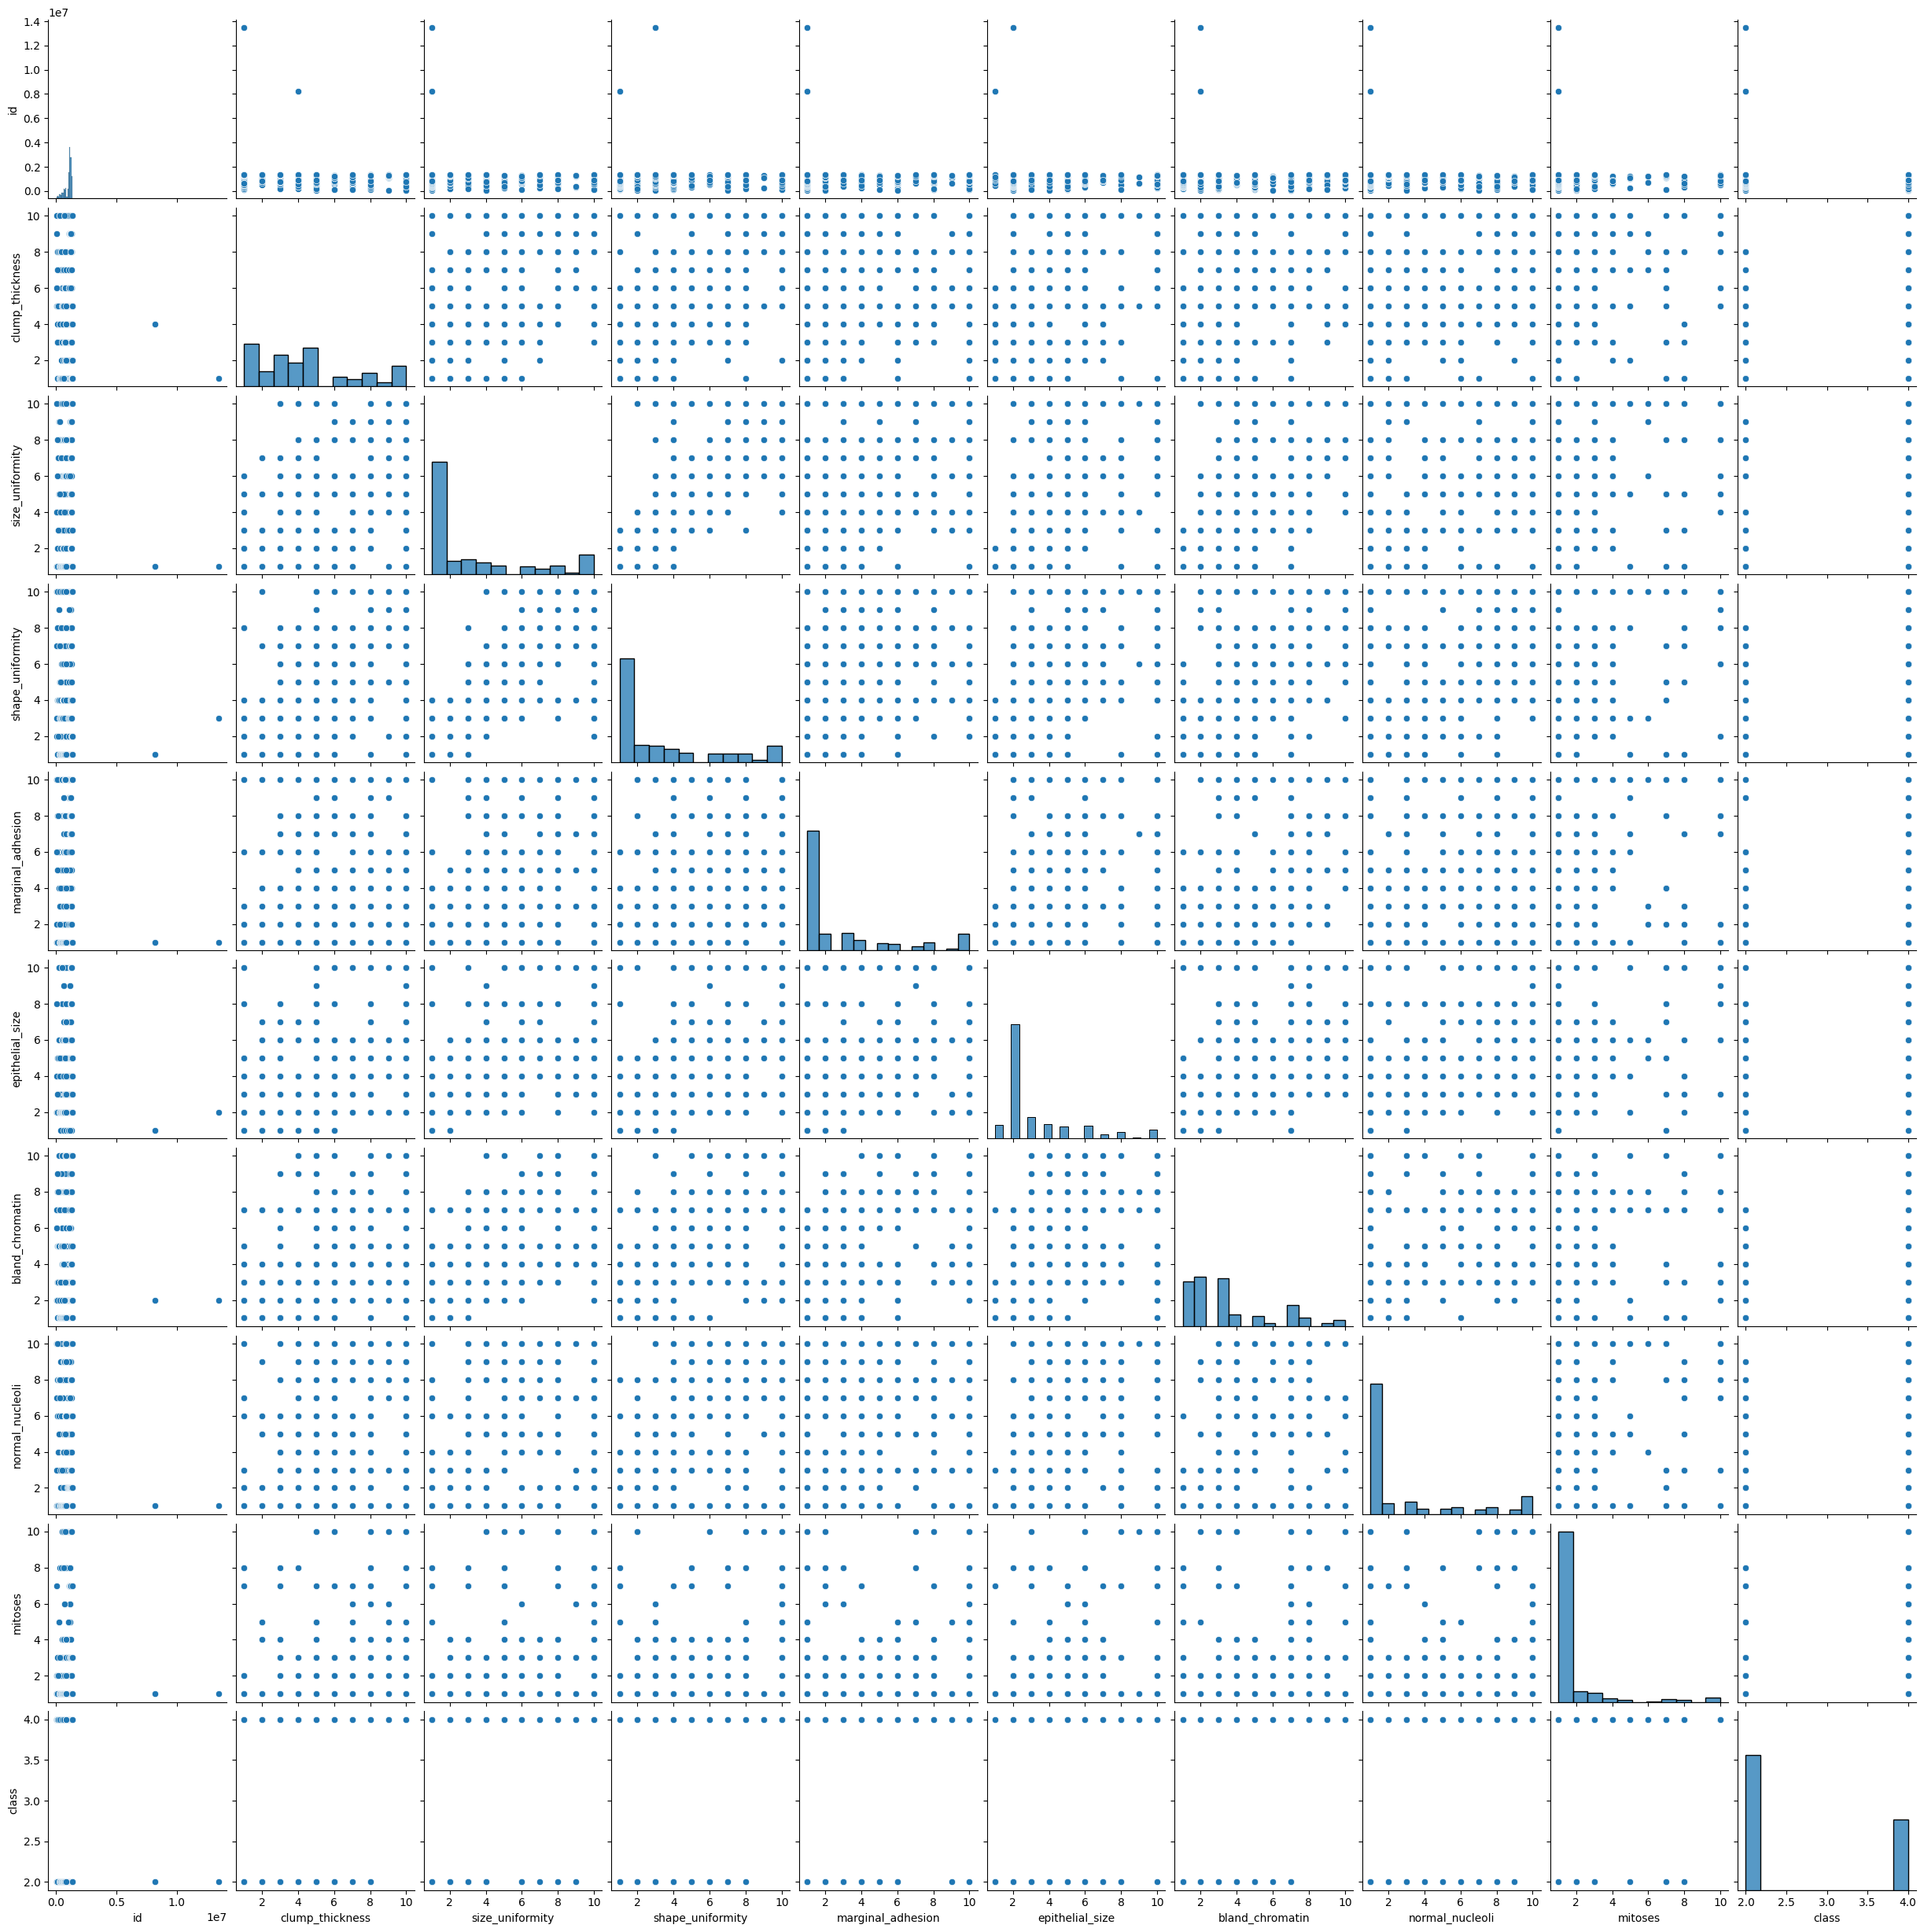

In [18]:
sns.pairplot(data=data)

# splitting the data

In [19]:
#splitting the data
x=data.drop(["class","bare_nucleoli","id"],axis=1)
y=data["class"]


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<IPython.core.display.Javascript object>

# feature selection

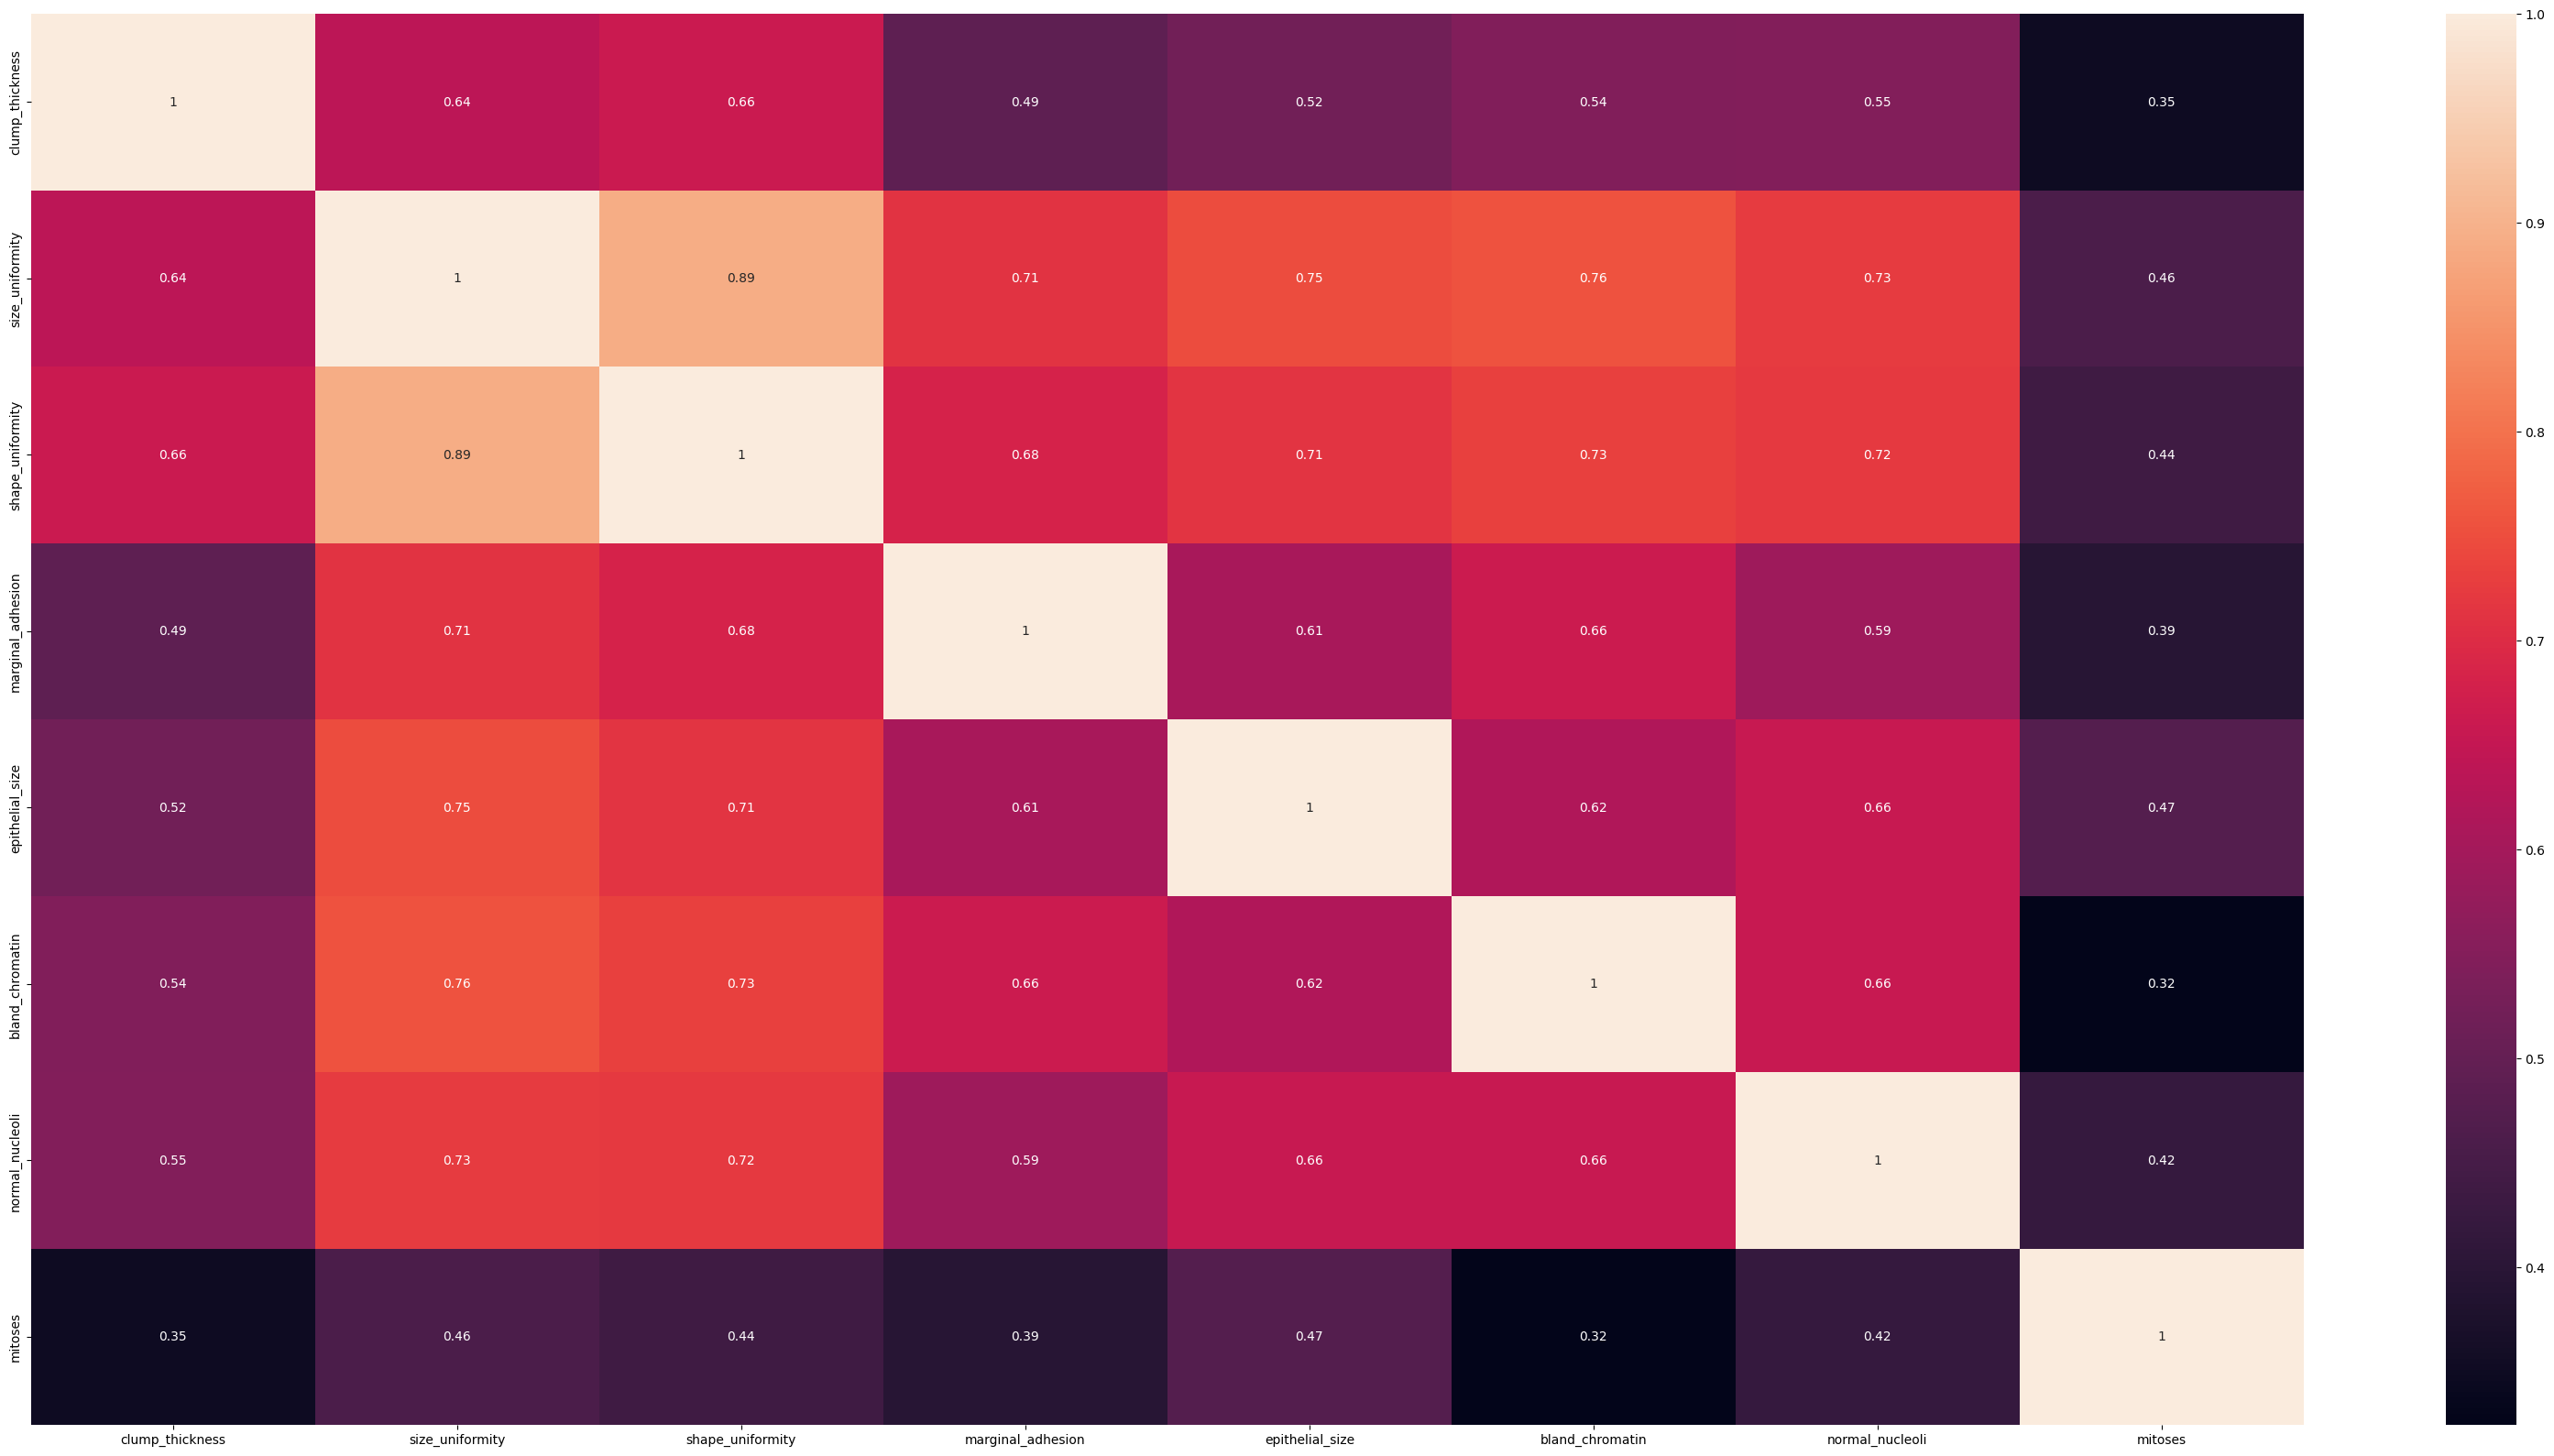

In [21]:
# feaure selection using pearson correlation where we removwe the feature that are correlated to each other ans remoin with features that highly correlated with the target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()


In [22]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features=correlation(x_train,0.8)
len(set(corr_features))

1

In [24]:
corr_features

{'shape_uniformity'}

In [25]:
data.columns


Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [26]:
# # dropping teh features that are highy correlated to each other
# x_train.drop(corr_features,axis=1,inplace=True)
# x_test.drop(corr_features, axis=1,inplace=True)

In [27]:
#getting teh remaining columns
x_train.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bland_chromatin',
       'normal_nucleoli', 'mitoses'],
      dtype='object')

# buildiing the model using randomforestclassifier

In [28]:

rf=RandomForestClassifier()

In [29]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
pred=rf.predict(x_test)

In [31]:
#evaluating the performance of the model
prediction=accuracy_score(y_test,pred)
prediction

0.9568345323741008

In [37]:
from sklearn.metrics import confusion_matrix
preds=confusion_matrix(y_test,pred)
preds

array([[83,  2],
       [ 4, 50]])

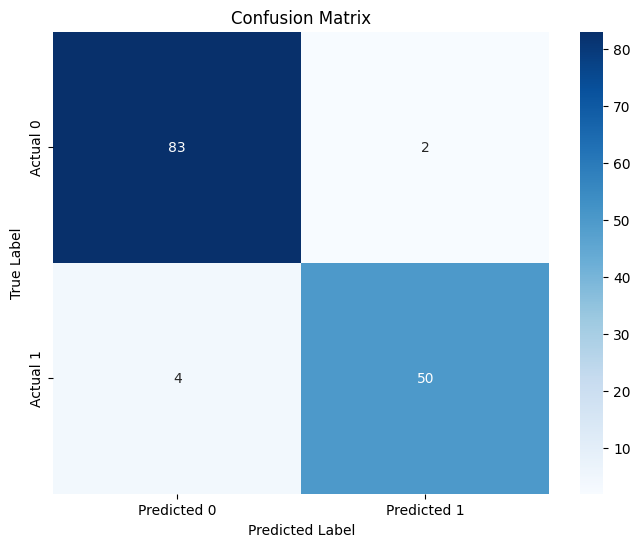

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(preds, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

<IPython.core.display.Javascript object>

,precision,recall,f1-score,support
2,0.954023,0.976471,0.965116,85.000000
4,0.961538,0.925926,0.943396,54.000000
accuracy,0.956835,0.956835,0.956835,0.956835
macro avg,0.957781,0.951198,0.954256,139.000000
weighted avg,0.956943,0.956835,0.956678,139.000000


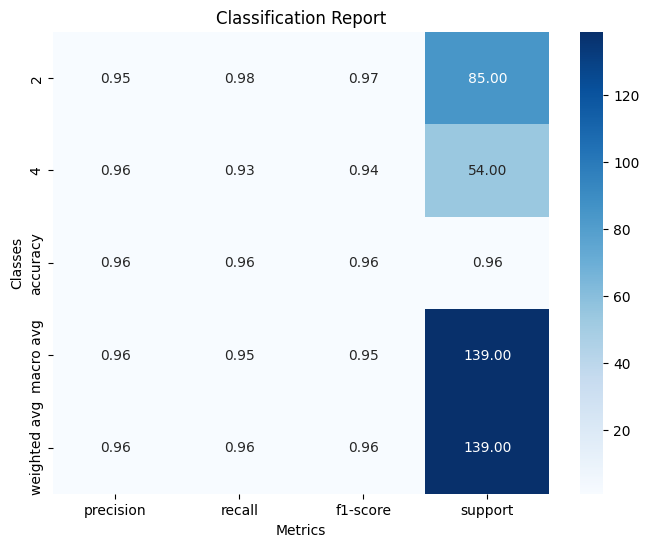

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [32]:
import pickle
with open('diagnoses2.pkl', 'wb') as files:
    pickle.dump(rf,files)
    

 # Building a predictive mode

In [33]:
y_test.iloc[1]

2

In [34]:
x_test.iloc[1]

clump_thickness      4
size_uniformity      1
shape_uniformity     1
marginal_adhesion    1
epithelial_size      2
bland_chromatin      3
normal_nucleoli      2
mitoses              1
Name: 165, dtype: int64

In [35]:
# input_data=(1,1,1,1,1,1)

# #changing input data into numpy array
# convert=np.asarray(input_data)
# #reshaping data as we are predicting the label for one instance
# reshaping=convert.reshape(1,-1)
# prediction=rf.predict(reshaping)
# print(prediction)